# Исследование надежности заемщиков


## Шаг 1. Обзор данных

### 1. Импортировали необходимые библиотеки. Считали данные из csv-файла в датафрейм и сохраниили в переменной `data`.
**Путь к файлу:** `https://code.s3.yandex.net/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pd.read_csv('data.csv')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

### 2. Вывели первые 20 строчек датафрейма `data` на экран.

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### 3. Вывели основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


___
___

## Шаг 2. Предобработка данных

### Удаление пропусков

#### 4. Вывели количество пропущенных значений для каждого столбца. Использовали комбинацию методов `isna()` и `sum()` .

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

#### 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

*Написали цикл, который проходится по уникальным значениям в столбце `income_type`, находит для каждой категории медиану и заменяет пропуски этим значением*

In [6]:
for position in list(data['income_type'].str.lower().unique()):
    median_position_value = data[(data['income_type'] == position) & (data['total_income'] != np.nan)]['total_income'].median()
    target_series = data[(data['income_type'] == position) & (data['total_income'].isnull())]['total_income']

    for i in list(target_series.index.values):
        data.loc[i, 'total_income'] = median_position_value

print('Количество пропусков:', data['total_income'].isnull().sum())

Количество пропусков: 0


___
___

### Обработка аномальных значений

#### 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом в нашем случае будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально.

*Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`.*

In [7]:
data['days_employed'] = data['days_employed'].abs()
data['days_employed'].head(20) # Проверка изменений

0       8437.673028
1       4024.803754
2       5623.422610
3       4124.747207
4     340266.072047
5        926.185831
6       2879.202052
7        152.779569
8       6929.865299
9       2188.756445
10      4171.483647
11       792.701887
12              NaN
13      1846.641941
14      1844.956182
15       972.364419
16      1719.934226
17      2369.999720
18    400281.136913
19     10038.818549
Name: days_employed, dtype: float64

#### 7. Для каждого типа занятости вывели медианное значение трудового стажа `days_employed` в днях.

In [8]:
data.groupby('income_type').agg({'days_employed' : 'median'})

,days_employed
income_type,
безработный,366413.652744
в декрете,3296.759962
госслужащий,2689.368353
компаньон,1547.382223
пенсионер,365213.306266
предприниматель,520.848083
сотрудник,1574.202821
студент,578.751554


У двух типов (безработные и пенсионеры) получатся аномально большие значения.
Исправить такие значения сложно, и этот столбец не понадобится нам в дальнейшем исследовании, поэтому оставим их как есть.

#### 8. Выведем перечень уникальных значений столбца `children`.

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

#### 9. В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [10]:
data = data[data.children.isin([-1, 20]) == False]

#### 10. Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [11]:
print(data['children'].unique())

[1 0 3 2 4 5]


___
___

### Удаление пропусков (продолжение)

#### 11. Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости - столбец `income_type`.

*Используем тот же способ, что и в пункте 5*

In [12]:
for position in list(data['income_type'].str.lower().unique()):
    median_position_value = data[(data['income_type'] == position) & (data['days_employed'] != np.nan)]['days_employed'].median()
    target_series = data[(data['income_type'] == position) & (data['days_employed'].isnull())]['days_employed']

    for i in list(target_series.index.values):
        data.loc[i, 'days_employed'] = median_position_value

print('Количество пропусков:', data['total_income'].isnull().sum())

Количество пропусков: 0


#### 12. Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов.

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

___
___

### Изменение типов данных

#### 13. Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

#### 14. Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру с помощью метода `lower()`.

In [15]:
data['education'] = data['education'].str.lower()
data['education'].unique() # Проверим изменения

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

#### 15. Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, то удалим их при помощи метода `drop_duplicates()`.

In [16]:
print('Кол-во дубликатов:', data.duplicated().sum())

Кол-во дубликатов: 71


In [17]:
data.drop_duplicates(inplace=True)

___
___

### Категоризация данных

#### 16. Создадим в датафрейме `data` столбец `total_income_category`, в котором присвоим клиенту категорию на основе его зарплаты (столбец `total_income`).

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


***Например*, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`.**

*Для этого создадим функцию с именем `categorize_income()` и применим метод `apply()`.*

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

#### 17. Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

#### 18. Теперь создадим функцию `categorize_purpose()`, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

*Применим метод `apply()` и передадим ему имя созданной функции для создания нового столбца*

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Шаг 3. Исследуем данные и рассмотрим возможные зависимости в данных

### 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?

#### Ход исследования

Сгруппируем данные по столбцу с кол-вом детей у клиента `children` и столбцу, хранящему данные о наличии задолженности у клиента - `debt`. Применим метод `count()` для подсчета количества людей в каждой группе.

In [23]:
debt_children = data.groupby(['children', 'debt'])['debt'].count()
debt_children

children  debt
0         0       13028
          1        1063
1         0        4364
          1         444
2         0        1858
          1         194
3         0         303
          1          27
4         0          37
          1           4
5         0           9
Name: debt, dtype: int64

**Формат данных не слишком удобный для дальнейшего исследования.**

Создадим датафрейм из серии с мультиидексацией и перезапишем в эту же переменную.

In [24]:
debt_children = debt_children.unstack().reset_index()
debt_children.columns.name = None
debt_children[1].fillna(0, inplace=True) # Пропуск в последней строке (возникший из-за того, что не вернувших долг в срок с 5-ю детьми не было) заполним нулем

debt_children

,children,0,1
0,0,13028.0,1063.0
1,1,4364.0,444.0
2,2,1858.0,194.0
3,3,303.0,27.0
4,4,37.0,4.0
5,5,9.0,0.0


**Пропусков нет, поэтому приведем данные в 'человеческий' вид**

Присвоим корректные имена столбцам.

In [25]:
debt_children.rename(columns={'children' : 'children_amount', 0 : 'without_debt', 1 : 'with_debt'}, inplace=True) # Переименуем столбцы
debt_children.columns # Проверим текущие названия столбцов

Index(['children_amount', 'without_debt', 'with_debt'], dtype='object')

Добавим столбец `debted_fraction`, в который сохраним процентное значение доли имевших задолженность по кредиту

In [26]:
debt_children = debt_children.assign(
    debted_fraction=debt_children['with_debt'] / (debt_children['without_debt']+debt_children['with_debt']) * 100
)

debt_children

,children_amount,without_debt,with_debt,debted_fraction
0,0,13028.0,1063.0,7.543822
1,1,4364.0,444.0,9.234609
2,2,1858.0,194.0,9.454191
3,3,303.0,27.0,8.181818
4,4,37.0,4.0,9.756098
5,5,9.0,0.0,0.000000


#### Построим график по извлеченным данным

Для этого воспользуемся набором функций из библиотеки `matplotlib` и библиотеки `seaborn`

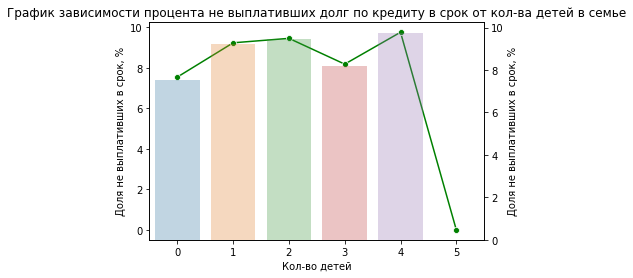

In [27]:
fig, ax1 = plt.subplots()

sns.lineplot(data=debt_children.debted_fraction, color='green', marker='o')
ax1.set_xlabel('Кол-во детей')
ax1.set_ylabel('Доля не выплативших в срок, %')

ax2 = ax1.twinx()

sns.barplot(data=debt_children, x='children_amount', y='debted_fraction', alpha=0.3)
ax2.set_ylabel('Доля не выплативших в срок, %')

plt.title('График зависимости процента не выплативших долг по кредиту в срок от кол-ва детей в семье')
plt.show()

#### Вывод

Данные по всем клиентам были сгруппированы исходя из кол-ва детей у каждого и показателя выплаты долга по кредиту в срок - столбец `debt` в исходных данных.

Для каждой группы клиентов нашли долю не выплативших кредит в срок и построили график зависимости процента не выплативших в срок от кол-ва детей в семье (см. выше).

*Судя по графику*, при большем кол-ве детей процент клиентов не выплативших кредит в срок `увеличивается`. Это с уверенностью можно сказать о столбцах `0, 1, 2`, так как клиентов с таким количеством детей большинство, и такой выборки достаточно для составления объективных выводов.

По клиентам с **4-мя и 5-ю детьми** требуется больше данных, так как в данный момент нельзя сделать однозначные выводы об этих группах клиентов.

Аномальное значение доли не выплативших в срок кредит клиентов с 5-ю детьми можно объяснить малым кол-вом человек в этой группе (всего 9) и все из них вернули кредит в срок.

### 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?

#### Ход исследования

**По аналогии с предыдущим шагом сгруппируем исходные данные по столбцу `family_status` и столбцу `debt`.**

*Вызовем метод `count()` для подсчета кол-ва клиентов в каждой группе*

In [28]:
debt_family_status = data.groupby(['family_status', 'debt'])['debt'].count()
debt_family_status

family_status          debt
Не женат / не замужем  0        2523
                       1         273
в разводе              0        1105
                       1          84
вдовец / вдова         0         888
                       1          63
гражданский брак       0        3749
                       1         385
женат / замужем        0       11334
                       1         927
Name: debt, dtype: int64

**Создадим датафрейм `debt_family_status` для удобного использования данных в дальнейшем**

In [29]:
debt_family_status = debt_family_status.unstack().reset_index()
debt_family_status.columns.name = None
debt_family_status

,family_status,0,1
0,Не женат / не замужем,2523,273
1,в разводе,1105,84
2,вдовец / вдова,888,63
3,гражданский брак,3749,385
4,женат / замужем,11334,927


**Переименуем столбцы**

In [30]:
debt_family_status.rename(columns={0 : 'without_debt', 1 : 'with_debt'}, inplace=True) # Переименуем столбцы
debt_family_status.columns # Проверим текущие названия столбцов

Index(['family_status', 'without_debt', 'with_debt'], dtype='object')

**Добавим столбец с долей клиентов имевших задолженность, выраженной в процентах, в каждой из групп**

In [31]:
debt_family_status = debt_family_status.assign(
    debted_fraction=debt_family_status['with_debt'] / (debt_family_status['without_debt']+debt_family_status['with_debt']) * 100
)

debt_family_status

,family_status,without_debt,with_debt,debted_fraction
0,Не женат / не замужем,2523,273,9.763948
1,в разводе,1105,84,7.064760
2,вдовец / вдова,888,63,6.624606
3,гражданский брак,3749,385,9.313014
4,женат / замужем,11334,927,7.560558


#### Построим график для оценки влияния семейного положения клиента на возврат им кредита в срок

Для начала отсортируем данные по столбцу `debted_fraction` по возрастанию, чтобы график отображался корректно.
Используем метод `sort_values()`

In [32]:
debt_family_status_sorted = debt_family_status.sort_values(by='debted_fraction')
debt_family_status_sorted # Проверим результат

,family_status,without_debt,with_debt,debted_fraction
2,вдовец / вдова,888,63,6.624606
1,в разводе,1105,84,7.064760
4,женат / замужем,11334,927,7.560558
3,гражданский брак,3749,385,9.313014
0,Не женат / не замужем,2523,273,9.763948


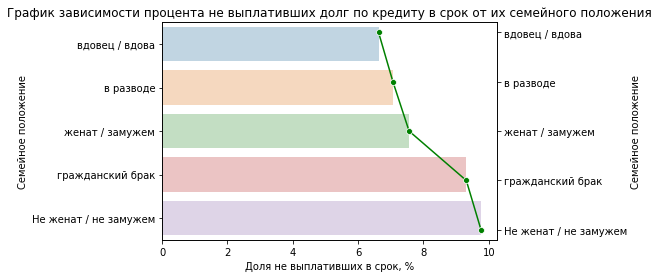

In [33]:
fig, ax1 = plt.subplots()

sns.barplot(data=debt_family_status_sorted, x='debted_fraction', y='family_status', alpha=0.3, orient='h')
ax1.set_ylabel('Семейное положение')
ax1.set_xlabel('Доля не выплативших в срок, %')

ax2 = ax1.twinx()

sns.lineplot(x=debt_family_status_sorted.debted_fraction, y=debt_family_status_sorted.family_status , color='green', marker='o')
ax2.set_ylabel('Семейное положение')
plt.title('График зависимости процента не выплативших долг по кредиту в срок от их семейного положения')
plt.show()

#### Вывод

Итак, по схожему с предыдущим шагом графику видно, что в большинстве случаев задолженность имеют/имели клиенты, которые не состоят в браке, либо находится в нем неофициально.

Предположительно, причиной таких результатов может являться распространенность в таких семьях следующего сценария:
- Пара берет кредит. Оформляется либо на мужчину, либо на женщину.
- Кредит планируется выплачивать совместно.
- По личным причинам семья распадается и задолженность по кредиту остается "на плечах" одного из бывших партнеров.
- По скольку суммарный доход падает, то выплачивать ту же сумму на погашение чаще всего не представляется возможным.

Среди тех, кто находятся либо в разводе, либо являются вдовцом / вдовой, наоборот меньше людей имеют/имели задолженность. Это может быть связано как и с тем, что клиентов с таким семейным положением меньше относительно общей массы, так и с тем, что сумма, взятая таким человеком, не очень большая. Следовательно, кредит в большинстве случаев выплачивается вовремя.

Клиенты, состоящие в браке, входят в самую большую группу в наших данных и кол-во должников в этой группе чуть менее 8 % от всех заемщиков, что, как видно из графика, представляет значение между теми, кто в браке не состоит или состоит неофициально и теми, кто находится в разводе или потерял жену/мужа. Это свидетельствует о том, что клиентам, состоящим в браке, банку стоит доверять больше, а это потенциально увеличит его прибыль, так как увеличится средняя величина суммы, выданной в кредит, среди таких лиц.

### 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

#### Ход исследования

**Как и до этого, для начала сгруппируем исходные данные по целевому столбцу `total_income_category` и столбцу `debt`. Применим метод `count()`.**

In [34]:
debt_category = data.groupby(['total_income_category', 'debt'])['debt'].count().unstack().reset_index()
debt_category.columns.name = None
debt_category

,total_income_category,0,1
0,A,23,2
1,B,4660,354
2,C,14568,1353
3,D,328,21
4,E,20,2


Переименуем столбцы `0` и `1`

In [35]:
debt_category.rename(columns={0: 'without_debt', 1: 'with_debt'}, inplace=True)

Добавим столбец `debt_fraction`, в который запишем процентное значение доли должников в каждой из категорий дохода.

In [36]:
debt_category['debt_fraction'] = round(
    ((debt_category['with_debt'] / (debt_category['with_debt'] + debt_category['without_debt'])) * 100), 2
    )

debt_category['client_amount'] = debt_category['with_debt'] + debt_category['without_debt']


debt_category

,total_income_category,without_debt,with_debt,debt_fraction,client_amount
0,A,23,2,8.00,25
1,B,4660,354,7.06,5014
2,C,14568,1353,8.50,15921
3,D,328,21,6.02,349
4,E,20,2,9.09,22


Данные для дальнейшего анализа сформированы. Перейдем к визуальной части исследования.

Обратим внимание, что наиболее распространенные категории дохода это `B` и `C`

#### Построим график, отражающий процент должников в каждой из категорий дохода

Также добавим на график подписи с общим кол-вом клиентов из каждой категории. Для этого воспользуемся циклом, который поочередно подпишет на каждом столбце кол-во клиентов из столбца `client_amount`.

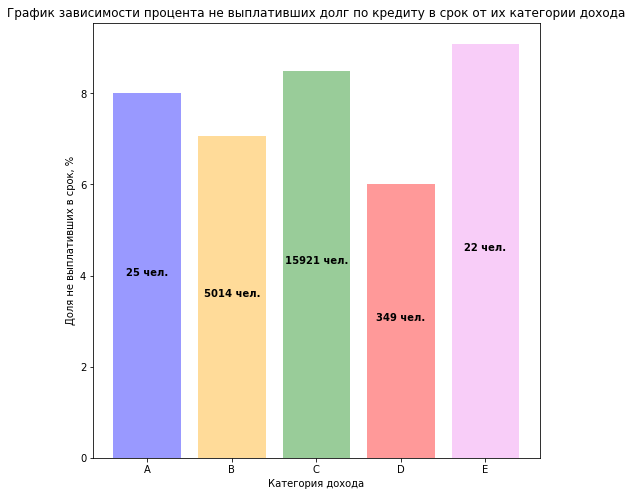

In [37]:
plt.figure(figsize=(8, 8))

graph = plt.bar( 
    debt_category.total_income_category, 
    debt_category.debt_fraction, 
    alpha=0.4,
    color=['blue', 'orange', 'green', 'red', 'violet']
)

plt.xlabel('Категория дохода')
plt.ylabel('Доля не выплативших в срок, %')

plt.title('График зависимости процента не выплативших долг по кредиту в срок от их категории дохода')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(
        x+width/2,
        y+height/2,
        str(debt_category.client_amount[i])+' чел.',
        ha='center',
        weight='bold'
    )
    i += 1
plt.show()

#### Вывод

Объективный вывод по полученным результатам можно сделать только по столбцам `B` и `C`, так как именно эти категории располагают достаточным кол-вом людей. 

Категории `A, D, E` требуют получения дополнительных данных для получения корректных выводов.

По данному графику видно, что люди с категорией дохода `B` чаще выплачивали долг по кредиту в срок. Но при этом больший процент должников в категории `C` может быть связан с тем, что клиентов из этой группы примерно в 3 раза больше. 

### 22. Как разные цели кредита влияют на его возврат в срок?

#### Ход исследования

Стоит напомнить, что всевозможные цели взятия кредита были объеденены по общим признакам и разделены по категориям, которые записаны в столбце `purpose_category`. 

Всего их четыре:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Создадим датафрейм `debt_purpose`, сгруппировав исходные данные по столбцам `purpose_category` и `debt`, а также применив к последнему метод `count()`.

Сразу уберем мультииндексацию и восстановим индексы при помощи комбиации методов `unstack()` и `reset_index()`

In [38]:
debt_purpose = data.groupby(['purpose_category', 'debt'])['debt'].count().unstack().reset_index()
debt_purpose.columns.name = None
debt_purpose

,purpose_category,0,1
0,операции с автомобилем,3879,400
1,операции с недвижимостью,9971,780
2,получение образования,3619,369
3,проведение свадьбы,2130,183


Переименуем столбцы `0` и `1`

In [39]:
debt_purpose.rename(columns={0: 'without_debt', 1: 'with_debt'}, inplace=True)
debt_purpose.columns

Index(['purpose_category', 'without_debt', 'with_debt'], dtype='object')

Создадим столбец: `debt_fraction`. В нем сохраним процент должников

In [40]:
debt_purpose['debt_fraction'] = round((debt_purpose['with_debt'] / (debt_purpose['without_debt'] + debt_purpose['with_debt']) * 100), 2)

debt_purpose

,purpose_category,without_debt,with_debt,debt_fraction
0,операции с автомобилем,3879,400,9.35
1,операции с недвижимостью,9971,780,7.26
2,получение образования,3619,369,9.25
3,проведение свадьбы,2130,183,7.91


Отсортируем строки датафрейма по возрастанию процента должников (столбец `debt_fraction`).

In [41]:
debt_purpose.sort_values(by='debt_fraction', inplace=True)

#### Построим график зависимости процента должников от целевой категории взятия кредита

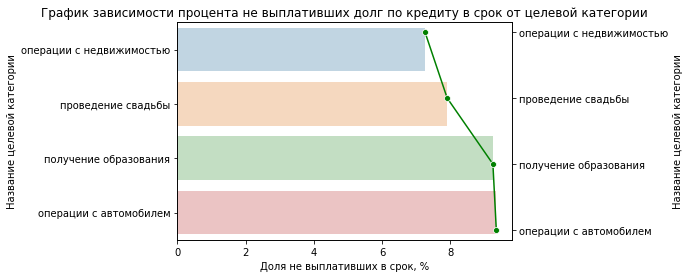

In [42]:
fig, ax1 = plt.subplots()

sns.barplot(data=debt_purpose, x='debt_fraction', y='purpose_category', alpha=0.3, orient='h')
ax1.set_ylabel('Название целевой категории')
ax1.set_xlabel('Доля не выплативших в срок, %')

ax2 = ax1.twinx()

sns.lineplot(x=debt_purpose.debt_fraction, y=debt_purpose.purpose_category , color='green', marker='o')
ax2.set_ylabel('Название целевой категории')
plt.title('График зависимости процента не выплативших долг по кредиту в срок от целевой категории')
plt.show()

#### Вывод

Долг по кредиту, взятому с целью проведения операций с недвижимостью, погашал вовремя наибольший процент клиентов. Такой результат может быть связан с тем, что кредиты в этой категории выдаются при наличии у банка уверенности в доходах клиента, а также с тем, что сумма кредита чаще всего не маленькая и выдается он на продолжительный срок. Следовательно, чем раньше клиент погасит кредит, тем меньше будет переплата по процентам.

На втором месте - проведение свадьбы. Здесь все может быть намного проще, так как суммы по кредитам для таких целей в разы меньше, следовательно выплатить их проще.

Получение образования и операции с автомобилем - цели, которые в большинстве случаев не приносят прибыли, сравнивая с той же недвижимостью, рыночная цена которой увеличивается. Из этого следует, что высокий процент должников, относительно других целей, обусловлен тем, что в этих случаях деньги не приносят еще больше денег, которые и позволяют выплачивать долг.

### 23. Возможные причины появления пропусков в исходных данных.

#### Ответ

**Основные причины:**

- Несовершенство способа внесения клиентом данных (н-р неудобное расположение регистрационных полей);

- Нежелание клиента передавать личные данные (данные о доходе, образовании, личной жизни).
  Сюда же входит использование клиентом антидетект браузеров, расширений, ограничивающих кол-во передаваемых сайтам данных;

- Необязательность ввода данных (н-р заполнение профиля в соцсети);

- Неверный формат выгрузки данных.

### 24. Почему заполнение пропусков медианным значением — лучшее решение для количественных переменных.

#### Ответ

Такой способ заполнения пропусков довольно интуитивный и быстрый. Искажение результатов немного меньше, нежели при заполнении пропусков средним значением, так как средние значение учитывает все выбросы, а медиана исключает влияние значений сильно больших и сильно меньших от нормы.

Его удобно применять, когда формирование или получение исходных данных непростое: метод позволяет избавиться от пропусков в уже имеющихся данных - их не требуется заново формировать.

Но в любом случае принятие решения о применении того или иного метода заполнения пропусков должно коррелировать с причинами появления этих пропусков. На небольшой выборке метод заполения пропусков медианным или средним значением может не давать серьезных отклонений от ожидаемых результатов, но с увеличением объема исследуемых данных результаты могут принять неожиданный вид.

## Шаг 4: Общий вывод исследования.

### Общий вывод

Нами был произведен анализ статистических данных банка по всем заемщикам в некоторый период времени для выявления закономерностей в платежной способности клиентов. В третьем шаге исследования были выдвинуты гипотезы о степени влияния количества детей у клиента, его семейного положения, уровня дохода и цели взятия кредита, на возврат им кредита в срок. Результаты, полученные в ходе исследования, должны явиться основой для построения модели, вычисляющей кредитный рейтинг клиента по совокупности предоставленных характеристик.

#### **Краткая сводка по выполненым задачам**

##### 1. Обзор данных

- Исходные данные были загружены и прочитаны. Просмотрена основная информация о них;


##### 2. Предобработка данных

- Была произведена обработка пропусков и неверных значений в столбцах `total_income`, `days_imployed` и `children`. Заменен тип данных в столбце `total_income`.
- Обработаны неявные дубликаты в столбце `education`. 
- Выполнена категоризация данных по столбцам `total_income` и `purpose`. Добавлены новые столбцы `total_income_category` и `purpose_category` соответственно.

##### 3. Исследование гипотез

- Выдвинута и исследована гипотеза о влиянии кол-ва детей у клиента на возврат им кредита в срок. Столбцы `children` и `debt` в исходных данных;
- Выдвинута и исследована гипотеза о влиянии семейного положения клиента на возврат им кредита в срок. Столбцы `family_status` и `debt` в исходных данных;
- Выдвинута и исследована гипотеза о влиянии уровня дохода клиента на возврат им кредита в срок. Столбцы `total_income_category` и `debt` в данных;
- Выдвинута и исследована гипотеза о влиянии целей взятия кредита клиентом на возврат им его в срок. Столбцы `purpose_category` и `debt` в данных;
- Обоснованы причины появляения пропусков в исходных данных;
- Обосновано применение метода заполнения пропусков медианным значением;

#### Подведем итоги по результатам каждой из гипотез

##### Гипотеза 1

В наших данных есть информация о клиентах без детей, с одним ребенком, двумя детьми, тремя детьми, четырьмя детьми и пятью детьми.

Рассмотрение результатов с клиентами, у которых более 3-ех детей не имеет практического смысла, так как по таким клиентам недостаточно данных.

Среди клиентов без детей, с одним ребенком, двумя детьми, тремя детьми имеем следующие результаты:
> нет детей -> 7.54 % должников

> 1 ребенок -> 9.23 % должников

> 2 ребенка -> 9.45 % должников

> 3 ребенка -> 8.18 % должников

###### **Общая тенденция**

Увеличение процента должников с ростом кол-ва детей в семье. Следовательно, чем меньше детей в семье клиента, тем с большей вероятностью он вернет кредит в срок.

##### Гипотеза 2

В цифрах имеем следующие результаты:
> вдовец / вдова -> 6.62 % должников

> в разводе ->  7.06 % должников

> женат / замужем -> 7.56 % должников

> гражданский брак -> 9.31 % должников

> не женат / не замужем -> 9.76 % должников

###### **Общая тенденция**

Вдовы / Вдовцы, клиенты, состоящие в браке чаще возвращают кредит вовремя, в отличие от клиентов, состоящих в неофицильном(гражданском) браке или не состоящих в нем. Следовательно, клиенты состоящие или бывшие в браке с большей долей вероятности вернут кредит в срок.

##### Гипотеза 3

Каждому из клиентов была присвоена категория, исходя из его дохода (столбец `total_income_category`).

Поскольку в категориях `A, D, E` не так много клиентов, то для того чтобы сделать среди них корректные выводы, треубется больше данных, поэтому их не рассматривали.

Среди категорий дохода `B` и `C` имеем следующее:
> Категория дохода **B** -> 7.06 % должников

> Категория дохода **C** ->  8.50 % должников

###### **Общая тенденция**

Клиенты с диапазоном дохода, попадающие в категорию `B` стабильнее в вопросе возврата кредита в срок, нежели те, кто входит в категорию `C` по доходу.

##### Гипотеза 4

Каждому из клиентов была присвоена категория, исходя из цели взятия им кредита (столбец `purpose_category`).

Среди всех категорий по целям взятия кредита имеем следующее:
> Категория **Операции с недвижимостью** -> 7.26 % должников

> Категория **Проведение свадьбы** ->  7.21 % должников

> Категория **Получение образования** -> 9.25 % должников

> Категория **Операции с автомобилем** ->  9.35 % должников

###### **Общая тенденция**

Клиенты, берущие кредит с целью продеведения операций с неджимостью, чаще всех возвращают кредит в срок. Вероятно, это связано с крупной переплатой по процентам, в случае задолженности. 

Тем, кто берет кредит на свадьбу, банку также выгодно доверять, ведь суммы кредита не большие, следовательно и выплата по процентам происходит быстрее.

Кредиты на получение образования чуть более выгодны банку, нежели кредиты для проведения операций с автомобилем, так как получение образования предполагает в будущем более высокий доход клиента. Но в то же время никак его не гарантирует, ровно как и операции с автомобилем. Следовательно, выдавать кредит с целью вложения денег в пассивы, банку не очень то и выгодно.

#### Вследствии чего могли быть получены неполноценные результаты?

- Отсутствие в исходных данных полноценной информации о клиентах с редкими характеристиками (большое кол-во детей в семье, большой доход и тд.);
- Неизвестные причины появляния аномальных значений, пропусков.

#### Рекомендации по исследованию в дальнейшем

- Попробовать пересмотреть принципы, по которым данные были разделены категориально;
- Рассмотреть более подробно связь других характеристик клиентов между собой для получения обширного портрета клиента в каждой из категорий;
- Запросить доп. данные о размере выплат каждого клиента по кредиту и дате этих выплат для определения проблемных ситуаций, влияющих на выплату клиентом кредита в срок.